In [1]:
from scipy import signal

import matplotlib.pyplot as plt

import numpy as np
from scipy import fftpack

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

## our question signal

In [2]:
t = np.linspace(-1.25, 1.25, 1000, endpoint=True)

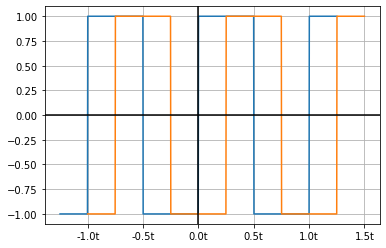

In [3]:
fig, ax = plt.subplots()
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1ft'))
ax.plot(t, signal.square(2 * np.pi  *t))
ax.plot(t+0.25, signal.square(2 * np.pi  *t))
ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')


## the signal fourier transform (currently not currect)

d:\users\hadar\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


<StemContainer object of 3 artists>

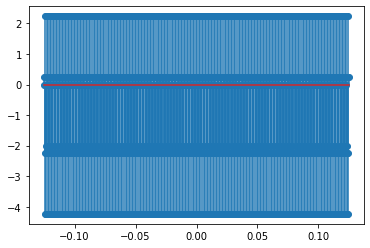

In [4]:
#t=np.array([-1.25,-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1,0.25])
#t
sig = signal.square(2 * np.pi  *t)
sp = np.fft.fft(signal.square(2 * np.pi  *t))
freq = np.fft.fftfreq(sig.size,4)
plt.stem(freq,sp.real)

d:\users\hadar\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


<StemContainer object of 3 artists>

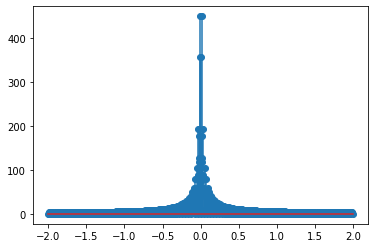

In [5]:
X = fftpack.fft(sig)
fr = fftpack.fftfreq(len(sig)) * 4
fig, ax = plt.subplots()

ax.stem(fr, np.abs(X))

## the signal fourier transform and reversed fourier transform

<class 'float'>


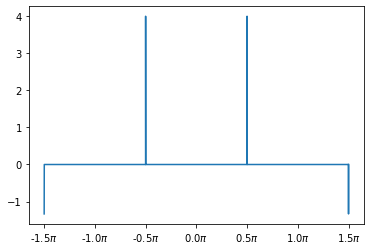

In [6]:
T = np.pi                      # time distance between pulses
Fs = 10000                  # sampling frequency, used for discretizing the system
t = np.arange(-6*np.pi/4, 6*np.pi/4, 1/Fs) # time range to consider
comb = np.zeros_like(t)
print(type(Fs*T))
fig, ax = plt.subplots()
comb[int(Fs*T):int(2*Fs*T):int(Fs*T)] = 4     # Comb becomes T every T*Fs samples
comb[:int(3*Fs*T):int(3*Fs*T-1)] = -4/3 
plt.plot(t/np.pi, comb)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f$\pi$'))
squr = np.fft.irfft(comb)
x=np.linspace(-1.25,1.25,len(squr))

In [7]:
squr.real

array([ 6.36625038e-05,  7.07606194e-06, -6.36641373e-05, ...,
        7.07361118e-06, -6.36641373e-05,  7.07606194e-06])

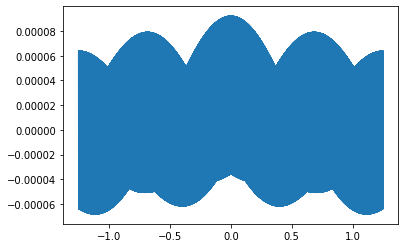

In [8]:
plt.plot(x,squr.real)


## trying something simple, cos fourier transform

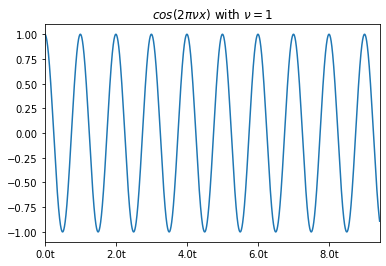

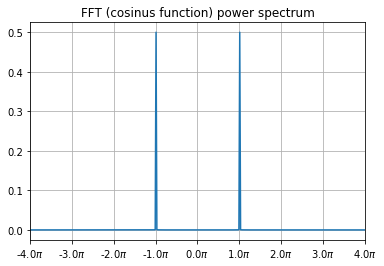

In [11]:
N = 50000 # Number of samplepoints

T = 1.0 / 1000.0 # sample spacing

x = np.linspace(0.0, N*T, N)

y = np.cos(2.0*np.pi*x)
fig, ax = plt.subplots()
plt.plot(x,y)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1ft'))
plt.xlim(0,3.0*np.pi)

plt.title(r'$cos(2\pi \nu x)$ with $\nu=1$')


yf = fftpack.fft(y)

yf = np.fft.fftshift(yf)

xf = np.linspace(-1.0/(2.0*T), 1.0/(2.0*T), N)  #can't figure out the meaning of this constants

fig, ax = plt.subplots()

ax.plot(xf, 1.0/N *np.abs(yf) )

plt.xlim(-4,4)
plt.title('FFT (cosinus function) power spectrum')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f$\pi$'))
plt.grid()

## this example doesn't really work

600


d:\users\hadar\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


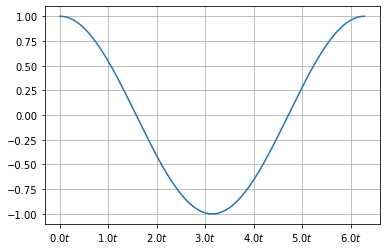

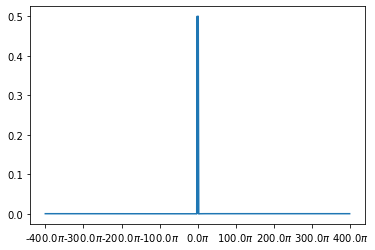

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

# Number of samplepoints
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0, 2*np.pi, N)
print(len(x))
fig, ax = plt.subplots()
y = np.cos(x)
plt.plot(x,y)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f$t$'))
ax.grid(True)

yf = np.fft.fft(y)
yf = np.fft.fftshift(yf)
xf = np.fft.fftfreq(N, T)

xf = np.fft.fftshift(xf)

freq = np.fft.fftfreq(N)

fig, ax = plt.subplots()
ax.plot(xf,yf/N)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f$\pi$'))
plt.show()

[-1.25      -1.2489996 -1.2479992 ...  1.2479992  1.2489996  1.25     ]


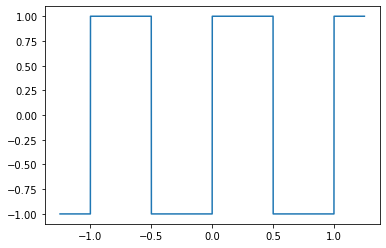

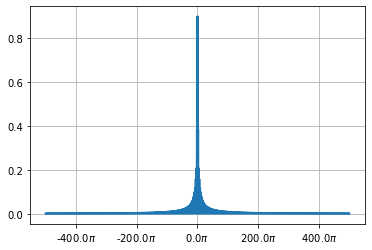

In [13]:
N = 1000*1.25 # Number of samplepoints

T = 1.0 / 1000.0 # sample spacing

x = np.linspace(-N*T, N*T,2*N)
print(x)
y =signal.square(2 * np.pi  *x)

plt.plot(x,y)

plt.show()

yf = scipy.fftpack.fft(y)

yf = np.fft.fftshift(yf)

xf = np.linspace(-1.0/(2.0*T), 1.0/(2.0*T), 2*N)

fig, ax = plt.subplots()

ax.plot(xf, 1.0/N *np.abs(yf) )
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f$\pi$'))

plt.grid()